In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('convert_numeric.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| status   | duration   | credit_history   | purpose   | amount   | savings   | employment_duration   | installment_rate   | gender   | marital_status   | other_debtors   | present_residence   | property   | age   | other_installment_plans   | housing   | number_credits   | job   | people_liable   | telephone   | foreign_worker   | credit_risk   |
|:---------|:-----------|:-----------------|:----------|:---------|:----------|:----------------------|:-------------------|:---------|:-----------------|:----------------|:--------------------|:-----------|:------|:--------------------------|:----------|:-----------------|:------|:----------------|:------------|:-----------------|:--------------|
| 0        | 6          | 1                | 3         | 1169     | 4         | 1                     | 4                  | 1        | 3                | 2               | 4                   | 2          | 67    | 1                         | 1         | 2                | 1     | 1               |

In [3]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,gender,marital_status,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.78300,20.903000,2.219000,3.823000,3271.258000,1.175000,1.701000,2.973000,0.690000,2.138000,1.866000,2.845000,1.358000,35.546000,0.908000,1.071000,1.407000,1.274000,1.155000,0.404000,0.963000,0.700000
std,1.22777,12.058814,1.064035,2.527461,2822.736876,1.605289,1.129103,1.118715,0.462725,1.019802,0.445244,1.103718,1.001418,11.375469,0.421561,0.531264,0.577654,0.946478,0.362086,0.490943,0.188856,0.458487
min,0.00000,4.000000,0.000000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.00000,12.000000,1.000000,2.000000,1365.500000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,2.00000,18.000000,3.000000,3.000000,2319.500000,0.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,3.00000,24.000000,3.000000,6.000000,3972.250000,2.000000,2.000000,4.000000,1.000000,3.000000,2.000000,4.000000,2.000000,42.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.00000,72.000000,4.000000,9.000000,18424.000000,4.000000,4.000000,4.000000,1.000000,3.000000,2.000000,4.000000,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


C:\Users\fajar\AppData\Local\Temp\ipykernel_21964\1298086128.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row][col].set_xticklabels(axes[row][col].get_xticklabels())
C:\Users\fajar\AppData\Local\Temp\ipykernel_21964\1298086128.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row][col].set_xticklabels(axes[row][col].get_xticklabels())
C:\Users\fajar\AppData\Local\Temp\ipykernel_21964\1298086128.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row][col].set_xticklabels(axes[row][col].get_xticklabels())
C:\Users\fajar\AppData\Local\Temp\ipykernel_21964\1298086128.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row][col

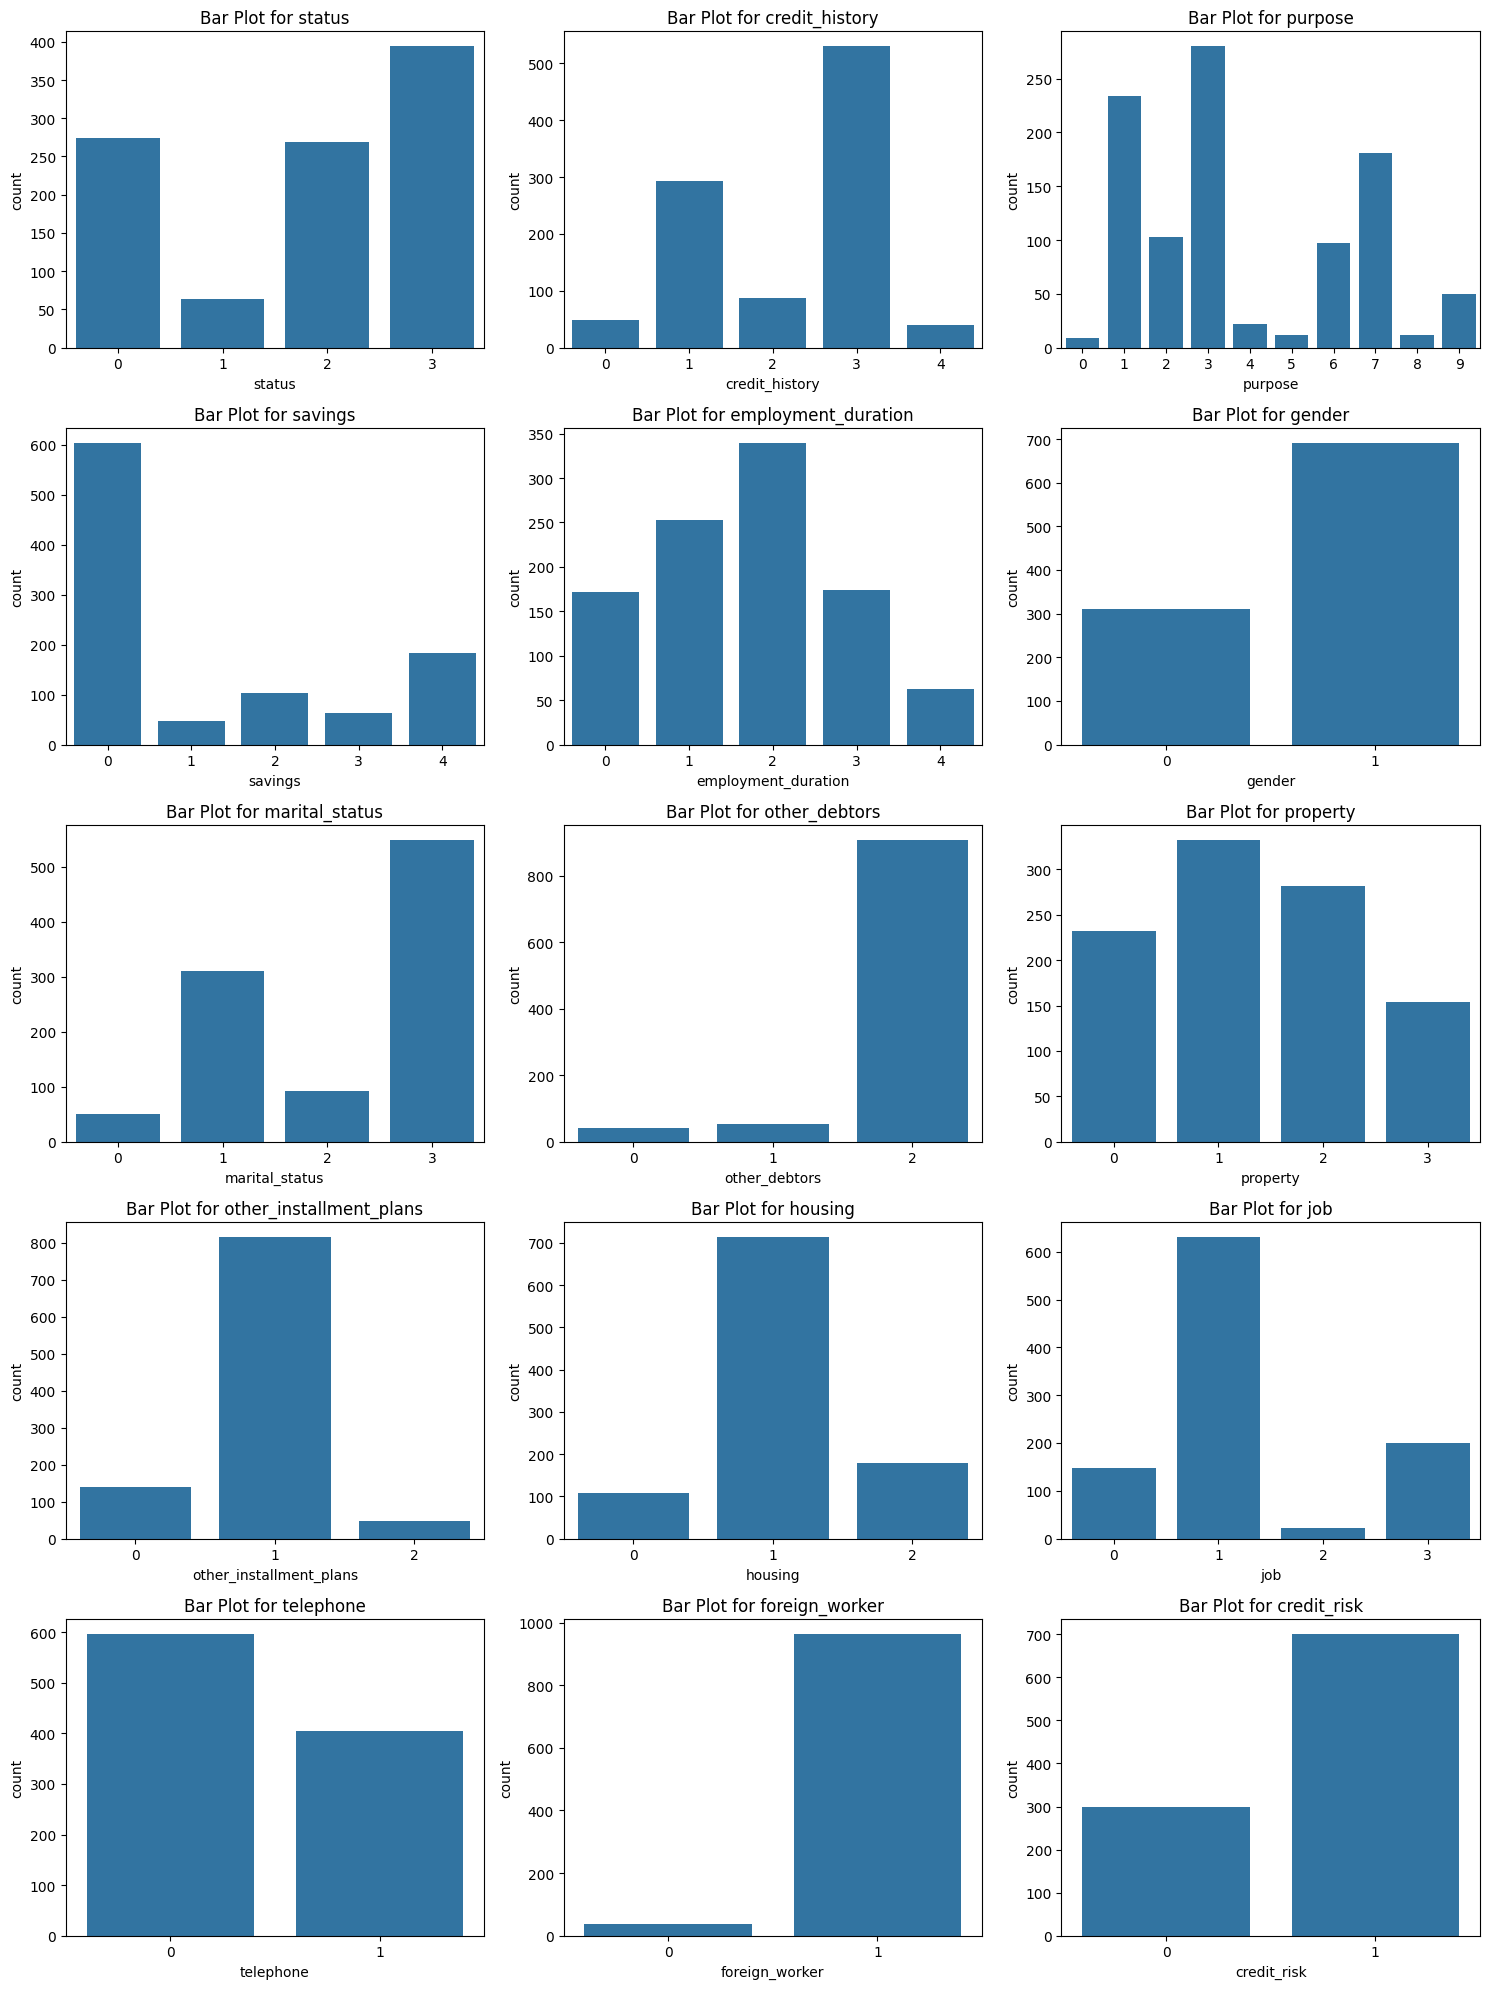

In [4]:
# Kolom-kolom yang ingin diplot
columns = ['status', 'credit_history', 'purpose', 'savings',
           'employment_duration', 'gender', 'marital_status',
           'other_debtors', 'property', 'other_installment_plans',
           'housing', 'job', 'telephone', 'foreign_worker','credit_risk']

# Mengatur ukuran subplot
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Melakukan plotting untuk setiap kolom
for i, col in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.countplot(x=columns[i], data=df, ax=axes[row][col])  # Gunakan nama kolom dari list columns
    axes[row][col].set_title(f'Bar Plot for {columns[i]}')
    axes[row][col].set_xticklabels(axes[row][col].get_xticklabels())

plt.tight_layout()
plt.show()

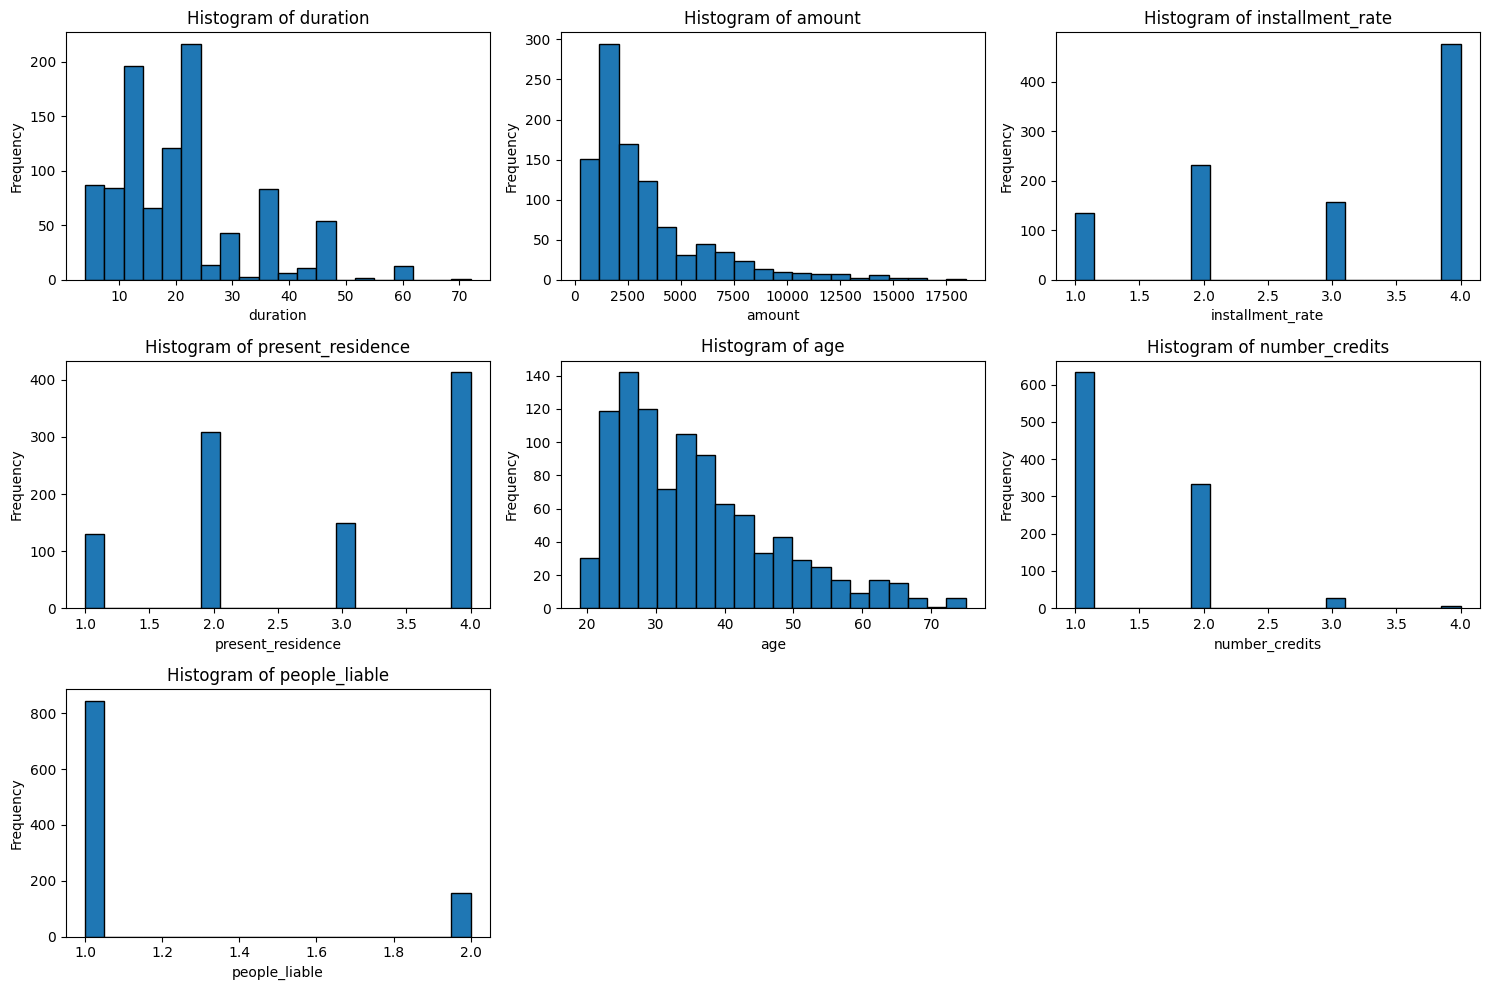

In [8]:

# Kolom-kolom yang ingin diplot
column = ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable']

# Membuat bar plot untuk setiap kolom
# Mengatur ukuran subplot
plt.figure(figsize=(15, 10))

# Membuat histogram untuk setiap kolom dalam satu halaman
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=20, edgecolor='black')  # Menambahkan jumlah bins dan edgecolor
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()